In [2]:
#Data preparation

In [3]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns

In [4]:
clinical_records = pd.read_csv("heart_failure_clinical_records_dataset.csv", error_bad_lines=False)

In [5]:
clinical_records.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
clinical_records.shape

(299, 13)

In [7]:
clinical_records.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
clinical_records.describe()
#creatinine_phosphokinase, platelets, serum_creatinine and serum_sodium need more investigation as max values look too high
#age and time looks fine since minimum and maximum age looks accurate

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
#checking for null values
clinical_records.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [10]:
#checking if there are different values
clinical_records['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [11]:
clinical_records['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [12]:
clinical_records['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [13]:
clinical_records['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [14]:
clinical_records['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [15]:
clinical_records['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [16]:
#Investigating Creatinine Phosphokinase
CP_data = clinical_records['creatinine_phosphokinase']
Q1 = CP_data.quantile(0.25)
Q3 = CP_data.quantile(0.75)
IQR = Q3-Q1
min_whisker = Q1-(IQR*1.5)
max_whisker = Q3 +(IQR*1.5)
outliers = CP_data[(CP_data<min_whisker)|(CP_data>max_whisker)]
outliers.values
#We can't assume these values to be impossible or invalid outliers as according to 
#https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test, there are possibilities for abnormal values
#Therefore, there is no justification to remove these values. We can instead use it for our analysis

array([7861, 2656, 1380, 3964, 7702, 5882, 5209, 1876, 1808, 4540, 1548,
       1610, 2261, 1846, 2334, 2442, 3966, 1419, 1896, 1767, 2281, 2794,
       2017, 2522, 2695, 1688, 1820, 2060, 2413], dtype=int64)

In [17]:
#Investigating Platelets
P_data = clinical_records['platelets']
Q1 = P_data.quantile(0.25)
Q3 = P_data.quantile(0.75)
IQR = Q3-Q1
min_whisker = Q1-(IQR*1.5)
max_whisker = Q3 +(IQR*1.5)
outliers = P_data[(P_data<min_whisker)|(P_data>max_whisker)]
outliers.values
#Same as Creatinine phospholinase, humans can have higher than normal rates of platelets in the blood. This was stated by 
#https://www.infobloom.com/what-is-a-high-platelet-count.htm . As a result, there is no strong reason to remove these values

array([454000.,  47000., 451000., 461000., 497000., 621000., 850000.,
       507000., 448000.,  75000.,  70000.,  73000., 481000., 504000.,
        62000., 533000.,  25100., 451000.,  51000., 543000., 742000.])

In [18]:
#Investigating Serum Creatinine
SC_data = clinical_records['serum_creatinine']
Q1 = SC_data.quantile(0.25)
Q3 = SC_data.quantile(0.75)
IQR = Q3-Q1
min_whisker = Q1-(IQR*1.5)
max_whisker = Q3 +(IQR*1.5)
outliers = SC_data[(SC_data<min_whisker)|(SC_data>max_whisker)]
outliers.values
#According to the article https://www.emedicinehealth.com/creatinine_blood_tests/article_em.htm , a higher value of 
#serum creatinine signals health problems in the patient. Therefore, these are valid outliers

array([2.7, 9.4, 4. , 5.8, 3. , 3.5, 2.3, 3. , 4.4, 6.8, 2.2, 2.7, 2.3,
       2.9, 2.5, 2.3, 3.2, 3.7, 3.4, 6.1, 2.5, 2.4, 2.5, 3.5, 9. , 5. ,
       2.4, 2.7, 3.8])

In [19]:
#Investigating Serum Sodium
SS_data = clinical_records['serum_sodium']
Q1 = SS_data.quantile(0.25)
Q3 = SS_data.quantile(0.75)
IQR = Q3-Q1
min_whisker = Q1-(IQR*1.5)
max_whisker = Q3 +(IQR*1.5)
outliers = SS_data[(SS_data<min_whisker)|(SS_data>max_whisker)]
outliers.values
#It is possible for a patient to have serum sodium levels below the normal 135 mEq/L, so these values are not invalid outliers

array([116, 121, 124, 113], dtype=int64)

In [20]:
#The data looks clean and no further checking is required.

In [21]:
#Data Exploration

In [22]:
#Let's explore each column in detail

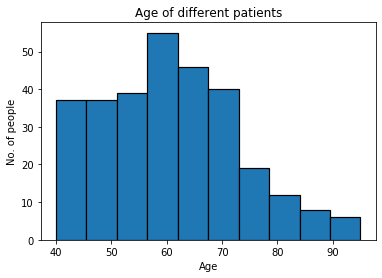

In [23]:
#We can see the age range of the patients.
clinical_records['age'].plot(kind = 'hist', bins = 10,edgecolor='black', linewidth=1.2)
plt.title('Age of different patients')
plt.xlabel('Age')
plt.ylabel('No. of people')
plt.show()

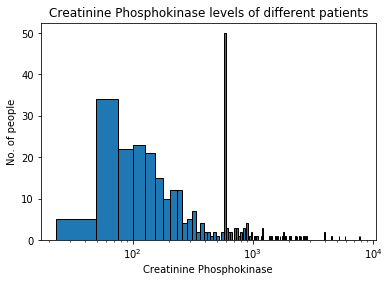

In [24]:
#x values are way too high to draw, therefore, we need to use log scale
#The historgram is skewed to the right
clinical_records['creatinine_phosphokinase'].plot(kind = 'hist', bins = 300,edgecolor='black')
plt.title('Creatinine Phosphokinase levels of different patients')
plt.xscale('log')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('No. of people')
plt.show()

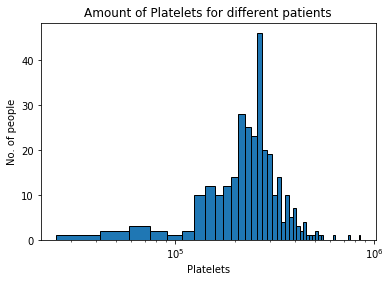

In [25]:
#Again, x values are too high. we need log scale
#Overall,this diagram is a bit skewed to the left
clinical_records['platelets'].plot(kind = 'hist', bins = 50,edgecolor='black')
plt.title('Amount of Platelets for different patients')
plt.xscale('log')
plt.xlabel('Platelets')
plt.ylabel('No. of people')
plt.show()

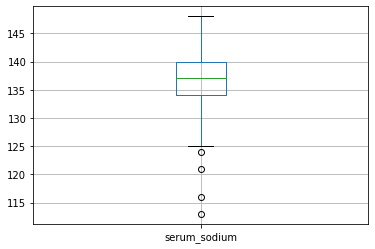

In [26]:
#There seem to be few outliers. Overall, it is symmetrically distributed
clinical_records.boxplot(column='serum_sodium')

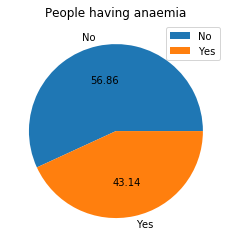

In [61]:
#Getting the percentage of people having anaemia
labels= ['No','Yes']
clinical_records['anaemia'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('People having anaemia')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

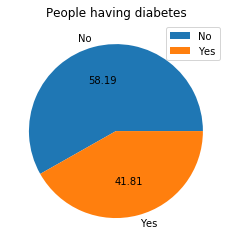

In [60]:
#Getting the percentage of people having diabetes
labels= ['No','Yes']
clinical_records['diabetes'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('People having diabetes')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

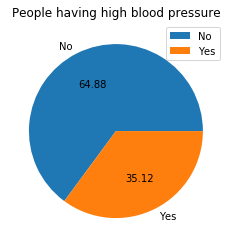

In [59]:
#Getting the percentage of people having high blood pressure
labels= ['No','Yes']
clinical_records['high_blood_pressure'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('People having high blood pressure')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

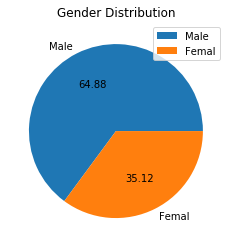

In [58]:
#No. of males and females
labels= ['Male','Femal']
clinical_records['sex'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('Gender Distribution')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

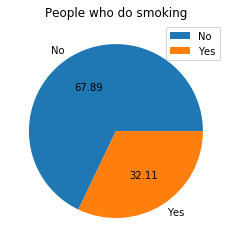

In [57]:
#Percentage of people who smoke
labels= ['No','Yes']
clinical_records['smoking'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('People who do smoking')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

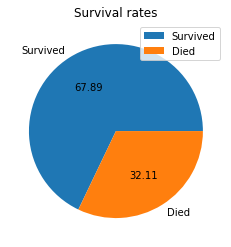

In [56]:
#Percentage of people dieing
labels= ['Survived','Died']
clinical_records['DEATH_EVENT'].value_counts().plot(kind= 'pie',autopct='%.2f',labels=labels)
plt.title('Survival rates')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

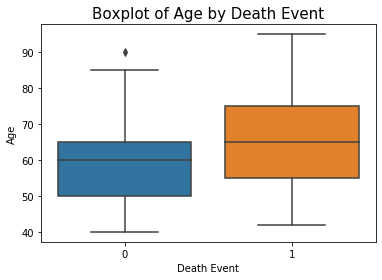

In [33]:
#Releationship between age and death rates.
#Younger people seemed to have better survival rate than those older.
sns.boxplot(clinical_records['DEATH_EVENT'], clinical_records['age'])
plt.xlabel("Death Event")
plt.ylabel("Age")
plt.title('Boxplot of Age by Death Event', fontsize = 15)
plt.show()

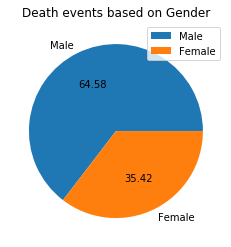

In [54]:
#Relationship between gender and death rates

#More males have died in comparsion to females.
total_deaths = clinical_records[clinical_records.DEATH_EVENT==1]

male_records = clinical_records[clinical_records.sex==1]
male_death = male_records[male_records.DEATH_EVENT==1]

female_records = clinical_records[clinical_records.sex==0]
female_death = female_records[female_records.DEATH_EVENT==1]

values = [male_death.shape[0],female_death.shape[0]]
df = pd.DataFrame(values)
labels= ['Male','Female']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.title('Death events based on Gender')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

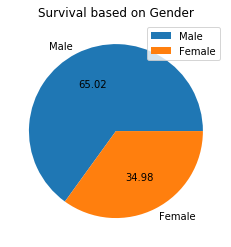

In [62]:
#Interestingly, more males have survived in comparsion to females
total_survivals = clinical_records[clinical_records.DEATH_EVENT==0]

male_records = clinical_records[clinical_records.sex==1]
male_survival = male_records[male_records.DEATH_EVENT==0]


female_records = clinical_records[clinical_records.sex==0]
female_survival = female_records[female_records.DEATH_EVENT==0]

values = [male_survival.shape[0],female_survival.shape[0]]
df = pd.DataFrame(values)
labels= ['Male','Female']
df.plot(kind='pie', subplots=True, autopct='%.2f',labels=labels)
plt.title('Survival based on Gender')
plt.legend(labels, loc="best")
plt.ylabel('')
plt.show()

In [92]:
#Getting the no of people dying with diabetes
mask = (clinical_records['diabetes']==1)&(clinical_records['DEATH_EVENT']==1)
mask.value_counts()

False    259
True      40
dtype: int64

In [137]:
mask = (clinical_records['smoking']==1)&(clinical_records['DEATH_EVENT']==0)
mask.value_counts()

False    233
True      66
dtype: int64